# Breast Cancer SVM

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn import datasets

In [10]:
data=datasets.load_breast_cancer()

In [19]:
type(data)

sklearn.utils._bunch.Bunch

In [23]:
X=data.data # acess value inside dictionary- Independent variable
y=data.target #Dependent variable

# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

# Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [47]:
x_trained_scaled=std.fit_transform(X_train)
x_test_scaled=std.transform(X_test)

In [49]:
x_test_scaled

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [51]:
x_trained_scaled

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

# Train the SVM Model

In [58]:
from sklearn.svm import SVC

In [62]:
svm_classifier=SVC(kernel='linear', C=1)# C=regularization or penalty- By default 1 and should not be negative

In [66]:
svm_classifier.fit(x_trained_scaled, y_train)

SVC(C=1, kernel='linear')

# Predict the result

In [69]:
y_pred= svm_classifier.predict(x_test_scaled)

# Evaluated the model

In [82]:
from sklearn.metrics import confusion_matrix, classification_report 
cm=confusion_matrix(y_test,y_pred)
print("confusion_matrix:\n",cm) # 2,3 diagonal should be 0,0 then it will be  best model

confusion_matrix:
 [[41  2]
 [ 3 68]]


In [84]:
cr=classification_report(y_test,y_pred)
print("classification_report:\n",cr)

classification_report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# Visualization of result using PCA

In [91]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [93]:
from sklearn.decomposition import PCA # combining important part of features to make it one and unwanted part is removed

In [95]:
pca=PCA(n_components=2)#out of 28 features combine into 2 features

In [97]:
X_train_pca=pca.fit_transform(X_train)

In [99]:
pd.DataFrame(X_train_pca).head()

,0,1
0,-684.157477,-55.264969
1,1379.328381,-75.106112
2,-690.799946,-38.583966
3,-521.642176,-41.776836
4,-613.490818,-25.440142


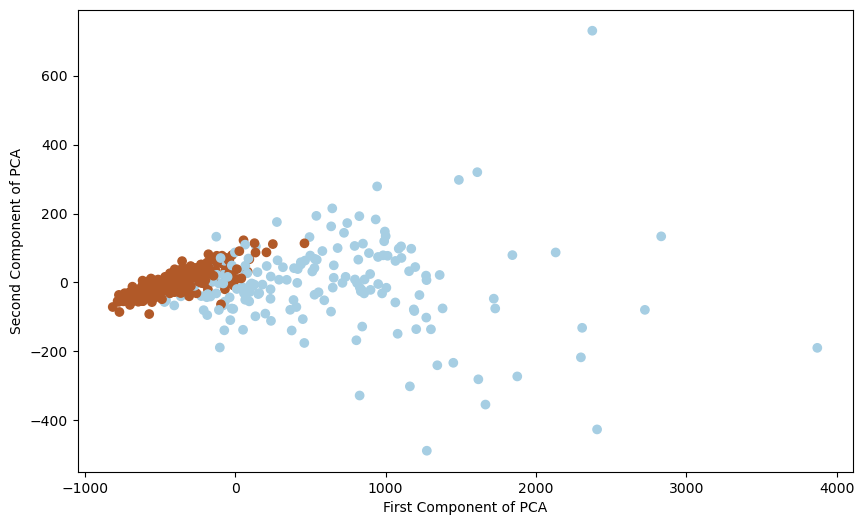

In [115]:
plt.figure(figsize=(10,6))

#Scatterplot
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],c=y_train, cmap=plt.cm.Paired)
plt.xlabel("First Component of PCA")
plt.ylabel("Second Component of PCA")

h=0.02
x_min, x_max=X_train_pca[:,0].min() -1, X_train_pca[:,0].max() -1
y_min, y_max=X_train_pca[:,1].min() -1, X_train_pca[:,1].max() -1

MemoryError: Unable to allocate 106. GiB for an array with shape (60883, 234142) and data type float64

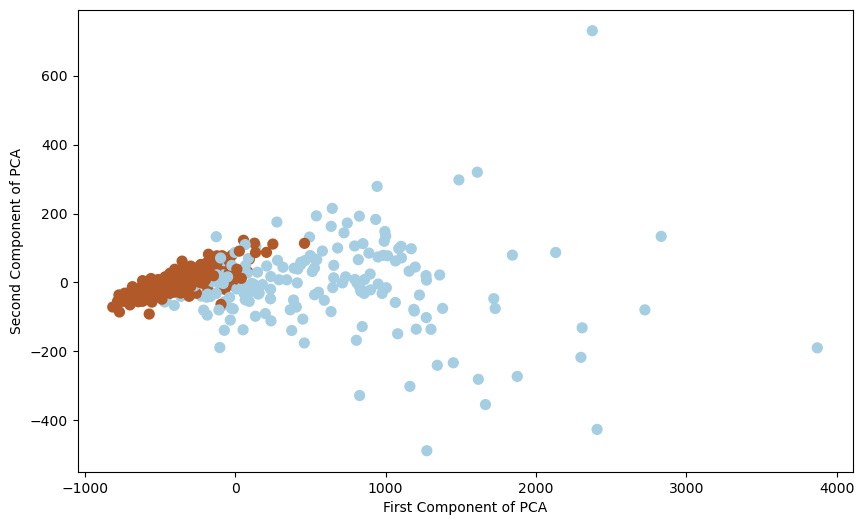

In [119]:
plt.figure(figsize=(10,6)) #scatter plot
plt.scatter(X_train_pca[:,0], X_train_pca[:, 1], c = y_train, cmap = plt.cm.Paired, s=50) 
plt.xlabel("First Component of PCA")
plt.ylabel("Second Component of PCA") # Plot the decision boundary of SVM h = .02 
x_min, x_max = X_train_pca[:,0].min() - 1, X_train_pca[:,0].max() - 1 
y_min, y_max = X_train_pca[:,1].min() - 1, X_train_pca[:,1].max() - 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
Z = svm_classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])) 
Z = Z.reshape(xx.shape) 

plt.show()